In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px grey solid !important;
  color: black !important;
}
</style>

In [2]:
# ignore future warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import re
import time

# processing of text
from preprocessing import Preprocessing

# models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader
import torchtext
from torchtext.legacy import data as dt
from model_functions import *
from model_torch import *
from argparse import Namespace
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# inicjalize table for result
result = ''

In [3]:
data = Preprocessing()

In [4]:
# data.load_data()
# data.remove_quoting_comments()
# data.demojize()
# data.clean_text(with_emoji=True)
# data.stopwords_remove()
# data.lemmatize_text()
# data.correct_typo_words()
# data.token_join()
# data.write_to_file(name='cleaned_data_with_stopwords_and_emoji')

In [5]:
args = Namespace(
    path_model="cleaned_data_binary_with_stopwords_and_emoji",
    path_torch="cleaned_data.csv",
    vocab_size = 400000,
    BATCH_SIZE = 64,
    EMBEDDING_DIM = 100,
    HIDDEN_DIM = 256,
    OUTPUT_DIM = 3,
    N_LAYERS = 2,
    BIDIRECTIONAL = True,
    DROPOUT = 0.5,
    N_EPOCHS = 15,
)

# Model

In [6]:
data.split_train_val_test(file_name=args.path_model)
data.tfidf_vectorizer()
data.count_vectorizer()

### TFIDF VEctorizer

In [7]:
# # Random Forest

# rf = Modeling(RandomForestClassifier(n_estimators=1000, random_state=0), 
#               data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
#               'Random Forest TFIDF')
# rf.fit_predict()
# rf.print_results()
# rf.plot_confusion_matrix()
# result = rf.add_to_table()

In [8]:
# Logistic Regression

# log_reg = Modeling(LogisticRegression(solver='newton-cg'), 
#                    data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
#                    'Logistic Regression TFIDF')
# log_reg.fit_predict()
# log_reg.print_results()
# log_reg.plot_confusion_matrix()
# result = log_reg.add_to_table()

In [9]:
# SMOTE for Logistic Regression

# log_reg_smote = Modeling(LogisticRegression(solver='newton-cg'), 
#                          data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
#                          'Logistic Regression SMOTE TFIDF')
# log_reg_smote.sample(SMOTE(sampling_strategy='minority'))
# log_reg_smote.fit_predict()
# log_reg_smote.print_results()
# log_reg_smote.plot_confusion_matrix()
# result = log_reg_smote.add_to_table()

In [10]:
# SVC

# svc = Modeling(SVC(probability=True), 
#                data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
#                'SVC TFIDF')
# svc.fit_predict()
# svc.print_results()
# svc.plot_confusion_matrix()
# result = svc.add_to_table()

In [11]:
# SMOTE for SVC

# svc_smote = Modeling(SVC(probability=True), 
#                      data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
#                      'SVC SMOTE TFIDF')
# svc_smote.sample(SMOTE(sampling_strategy='minority'))
# svc_smote.fit_predict()
# svc_smote.print_results()
# svc_smote.plot_confusion_matrix()
# result = svc_smote.add_to_table()

In [12]:
# Bayes

# bayes = Modeling(MultinomialNB(), 
#                  data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
#                  'Bayes TFIDF')
# bayes.fit_predict()
# bayes.print_results()
# bayes.plot_confusion_matrix()
# result = bayes.add_to_table()

In [13]:
# SMOTE for Bayes

# bayes_smote = Modeling(MultinomialNB(), 
#                        data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
#                        'Bayes SMOTE TFIDF')
# bayes_smote.sample(SMOTE(sampling_strategy='minority'))
# bayes_smote.fit_predict()
# bayes_smote.print_results()
# bayes_smote.plot_confusion_matrix()
# result = bayes_smote.add_to_table()

In [14]:
# XGBoost

# y_pred = XG_boost(data.X_train_tfidf, data.y_train, data.X_val_cv, data.y_val)
# result = add_to_table_xgboost(data.y_val,
#                               y_pred,
#                               result,
#                               'XGBoost TFIDF')
# plot_confusion_matrix(data.y_val, y_pred, 'XGBoost TFIDF')

In [15]:
# XGBoost smote

# y_pred = XG_boost_smote(data.X_train_tfidf, data.y_train, data.X_val_cv, data.y_val)
# result = add_to_table_xgboost(data.y_val,
#                               y_pred,
#                               result,
#                               'XGBoost Smote TFIDF')
# plot_confusion_matrix(data.y_val, y_pred, 'XGBoost Smote TFIDF')

### Count Vectorizer

In [16]:
# Random Forest

rf_cv = Modeling(RandomForestClassifier(n_estimators=1000, random_state=0), 
              data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
              'Random Forest CV')
rf_cv.fit_predict()
rf_cv.print_results()
result = rf_cv.add_to_table()

Results for Random Forest CV:
Random Forest CV accuracy: 0.8438
Random Forest CV f-score: 0.823
Random Forest CV recall: 0.8438


Results for Logistic Regression CV:
Logistic Regression CV accuracy: 0.8574
Logistic Regression CV f-score: 0.8455
Logistic Regression CV recall: 0.8574


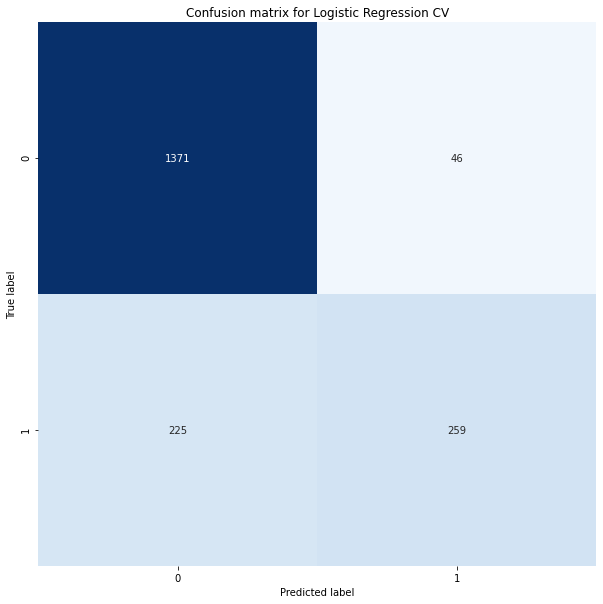

In [17]:
# Logistic Regression

log_reg_cv = Modeling(LogisticRegression(solver='newton-cg'), 
                   data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                   'Logistic Regression CV')
log_reg_cv.fit_predict()
log_reg_cv.print_results()
log_reg_cv.plot_confusion_matrix()
result = log_reg_cv.add_to_table()

In [18]:
# SMOTE for Logistic Regression

# log_reg_smote_cv = Modeling(LogisticRegression(solver='newton-cg'), 
#                          data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
#                          'Logistic Regression SMOTE CV')
# log_reg_smote_cv.sample(SMOTE(sampling_strategy='minority'))
# log_reg_smote_cv.fit_predict()
# log_reg_smote_cv.print_results()
# log_reg_smote_cv.plot_confusion_matrix()
# result = log_reg_smote_cv.add_to_table()

Results for SVC CV:
SVC CV accuracy: 0.8375
SVC CV f-score: 0.8138
SVC CV recall: 0.8375


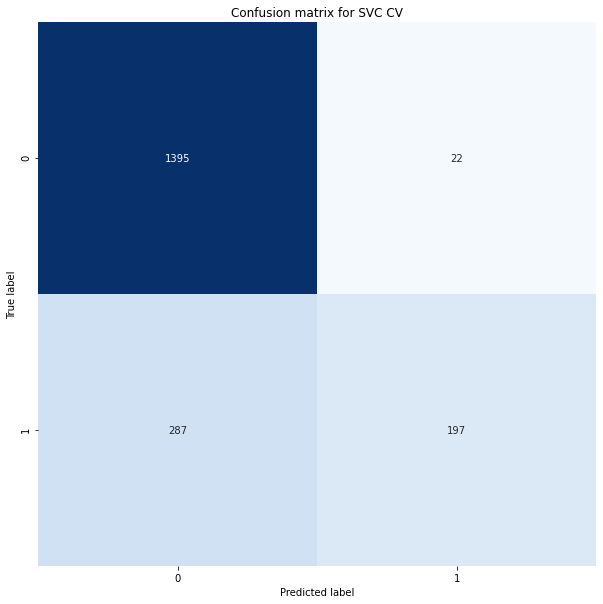

In [19]:
# SVC

svc_cv = Modeling(SVC(probability=True), 
               data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
               'SVC CV')
svc_cv.fit_predict()
svc_cv.print_results()
svc_cv.plot_confusion_matrix()
result = svc_cv.add_to_table()

In [20]:
# SMOTE for SVC

# svc_smote_cv = Modeling(SVC(probability=True), 
#                      data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
#                      'SVC SMOTE CV')
# svc_smote_cv.sample(SMOTE(sampling_strategy='minority'))
# svc_smote_cv.fit_predict()
# svc_smote_cv.print_results()
# svc_smote_cv.plot_confusion_matrix()
# result = svc_smote_cv.add_to_table()

Results for Bayes CV:
Bayes CV accuracy: 0.8648
Bayes CV f-score: 0.8595
Bayes CV recall: 0.8648


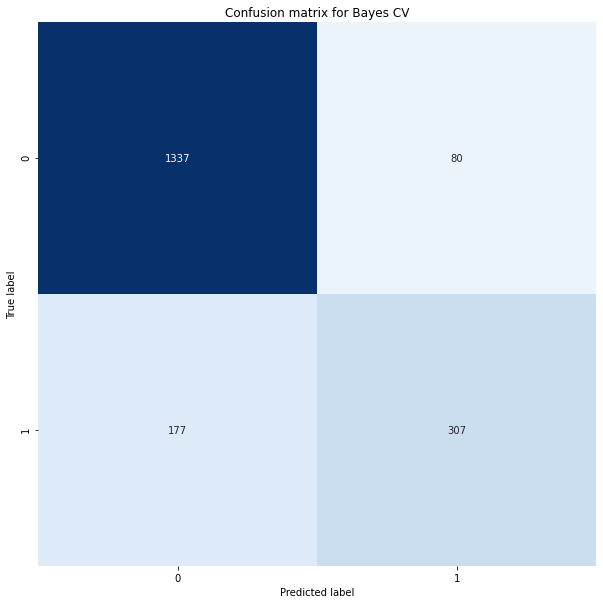

In [21]:
# Bayes

bayes_cv = Modeling(MultinomialNB(), 
                 data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                 'Bayes CV')
bayes_cv.fit_predict()
bayes_cv.print_results()
bayes_cv.plot_confusion_matrix()
result = bayes_cv.add_to_table()

In [22]:
# SMOTE for Bayes

# bayes_smote_cv = Modeling(MultinomialNB(), 
#                        data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
#                        'Bayes SMOTE CV')
# bayes_smote_cv.sample(SMOTE(sampling_strategy='minority'))
# bayes_smote_cv.fit_predict()
# bayes_smote_cv.print_results()
# bayes_smote_cv.plot_confusion_matrix()
# result = bayes_smote_cv.add_to_table()

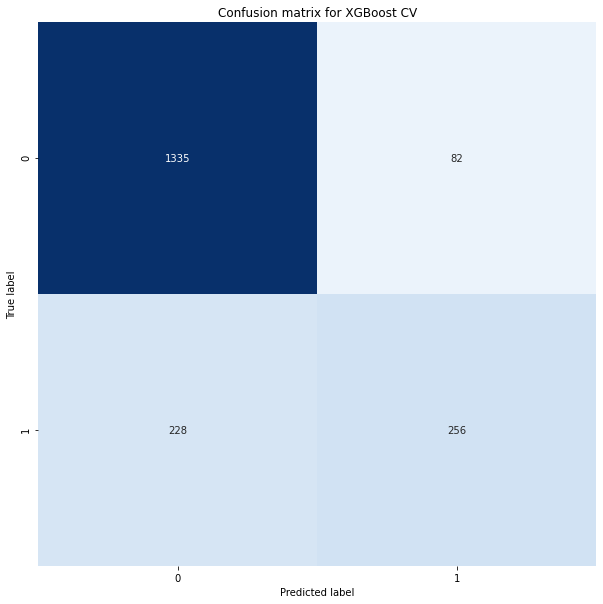

In [23]:
# XGBoost

y_pred = XG_boost(data.X_train_cv, data.y_train, data.X_val_cv, data.y_val)
result = add_to_table_xgboost(data.y_val,
                              y_pred,
                              result,
                              'XGBoost CV')
plot_confusion_matrix(data.y_val, y_pred, 'XGBoost CV')

In [24]:
# XGBoost smote

# y_pred = XG_boost_smote(data.X_train_cv, data.y_train, data.X_val_cv, data.y_val)
# result = add_to_table_xgboost(data.y_val,
#                               y_pred,
#                               result,
#                               'XGBoost Smote CV')
# plot_confusion_matrix(data.y_val, y_pred, 'XGBoost Smote CV')

### Gensim for the best model

In [25]:
# y_pred_g = XG_boost_gensim(data.X_train, data.X_val, data.y_train)
# result = add_to_table_xgboost(data.y_val,
#                               y_pred_g,
#                               result,
#                               'XGBoost Gensim')
# plot_confusion_matrix(data.y_val, y_pred_g, 'XGBoost Gensim')

In [26]:
result.transpose().sort_values(by='F-score', ascending=False)

,Accuracy,F-score,Recall
Bayes CV,0.8648,0.8595,0.8648
Logistic Regression CV,0.8574,0.8455,0.8574
XGBoost CV,0.8369,0.8264,0.8369
Random Forest CV,0.8438,0.8230,0.8438
SVC CV,0.8375,0.8138,0.8375


### LSTM

In [24]:
LABEL = dt.LabelField(dtype = torch.long)
TEXT = dt.Field(tokenize=simple_tokinizer, include_lengths = True)
fields = [('text', TEXT), ('label', LABEL)]

twitterDataset = torchtext.legacy.data.TabularDataset(
        args.path_torch, 
        format="CSV", 
        fields=fields,
        skip_header=True)

train_data, valid_data, test_data = twitterDataset.split(split_ratio=[0.7,0.15,0.15])

TEXT.build_vocab(train_data, max_size=args.vocab_size)

LABEL.build_vocab(train_data)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = dt.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = args.BATCH_SIZE,
    sort_within_batch = True,
    sort_key = lambda x: len(x.text))


model = RNN(len(TEXT.vocab), 
            args.EMBEDDING_DIM, 
            args.HIDDEN_DIM, 
            args.OUTPUT_DIM, 
            args.N_LAYERS, 
            args.BIDIRECTIONAL, 
            args.DROPOUT, 
            TEXT.vocab.stoi[TEXT.pad_token])

optimizer = optim.Adam(model.parameters())


criterion = nn.CrossEntropyLoss() 
model = model.to(device)
criterion = criterion.to(device)

In [25]:
# args.N_EPOCHS = 15

best_valid_loss = float('inf')

for epoch in range(args.N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc, train_prec = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc, valid_prec = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Train prec: {train_prec*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% | Valid prec: {valid_prec*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 1s
	Train Loss: 1.084 | Train Acc: 46.17% | Train prec: 48.77%
	 Val. Loss: 1.034 |  Val. Acc: 63.64% | Valid prec: 40.50%
Epoch: 02 | Epoch Time: 0m 1s
	Train Loss: 1.026 | Train Acc: 62.30% | Train prec: 46.53%
	 Val. Loss: 0.974 |  Val. Acc: 63.64% | Valid prec: 40.50%
Epoch: 03 | Epoch Time: 0m 1s
	Train Loss: 0.967 | Train Acc: 61.52% | Train prec: 37.91%
	 Val. Loss: 0.911 |  Val. Acc: 63.64% | Valid prec: 40.50%
Epoch: 04 | Epoch Time: 0m 1s
	Train Loss: 0.891 | Train Acc: 62.30% | Train prec: 51.52%
	 Val. Loss: 0.857 |  Val. Acc: 63.64% | Valid prec: 40.50%
Epoch: 05 | Epoch Time: 0m 1s
	Train Loss: 0.834 | Train Acc: 61.02% | Train prec: 37.44%
	 Val. Loss: 0.881 |  Val. Acc: 63.64% | Valid prec: 40.50%
Epoch: 06 | Epoch Time: 0m 1s
	Train Loss: 0.821 | Train Acc: 61.52% | Train prec: 37.91%
	 Val. Loss: 0.944 |  Val. Acc: 63.64% | Valid prec: 40.50%
Epoch: 07 | Epoch Time: 0m 1s
	Train Loss: 0.739 | Train Acc: 61.80% | Train prec: 51.07%
	 Val. Los

In [26]:
def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    _, prediction = torch.max(model(tensor, length_tensor), axis=1)
    return prediction.item()

In [27]:
prediction = torch.sigmoid(model(tensor, length_tensor))

NameError: name 'tensor' is not defined